# Sentiment Analysis Of Tweets

The task is to squeeze out as much insights as possible from just a single feature (tweets).
The dataset contains tweets categorized as "Offensive (racism/sexism)" labelled as 1 and "Not offensive" labelled as 0.

In [1]:
import re
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
import spacy
from tqdm.notebook import tqdm
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from IPython.display import display
from wordcloud import WordCloud, STOPWORDS

*Loading data set*

In [2]:
train = pd.read_csv("C:/Users/KAUSHIK/Desktop/Sentiment analysis/train.csv")
test = pd.read_csv("C:/Users/KAUSHIK/Desktop/Sentiment analysis/test.csv")

*Preprocessing*

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [5]:
train.drop("id",axis = 1,inplace=True)

In [6]:
train.isnull().sum()

label    0
tweet    0
dtype: int64

In [7]:
train.shape

(31962, 2)

In [8]:
train.columns

Index(['label', 'tweet'], dtype='object')

In [9]:
train.dtypes

label     int64
tweet    object
dtype: object

In [10]:
train['label'].unique()

array([0, 1], dtype=int64)

In [11]:
train['label'].nunique()

2

In [12]:
train['length'] = train['tweet'].apply(len)
train.head(10)

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
5,0,[2/2] huge fan fare and big talking before the...,116
6,0,@user camping tomorrow @user @user @user @use...,74
7,0,the next school year is the year for exams.ð...,143
8,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,0,@user @user welcome here ! i'm it's so #gr...,50


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
 2   length  31962 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


*Visualization*

In [15]:
labels = {0: "Positive", 1: "Negative"}
labels

{0: 'Positive', 1: 'Negative'}

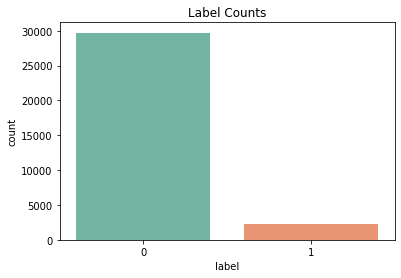

In [16]:
sns.countplot(x= train['label'],palette = "Set2")
plt.title('Label Counts')
plt.show()

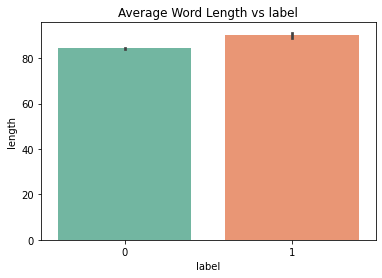

In [17]:
sns.barplot(x= 'label',y= 'length',data =train,palette = "Set2")
plt.title('Average Word Length vs label')
plt.show()

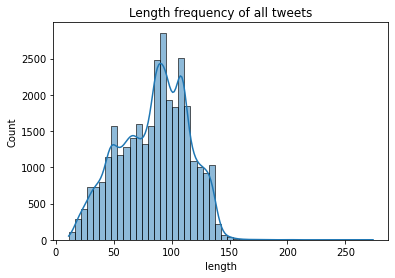

In [18]:
sns.histplot(train['length'],bins = 50,kde=True)

plt.title('Length frequency of all tweets')
plt.show()

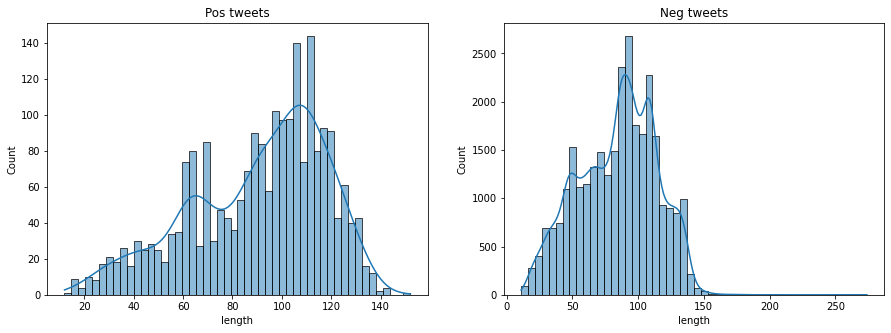

In [19]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
sns.histplot(train[train["label"] == 1]["length"],bins = 50,ax = ax1, kde=True).set(title = "Pos tweets")
sns.histplot(train[train["label"] == 0]["length"],bins = 50,ax = ax2, kde=True).set(title = "Neg tweets")
plt.show()

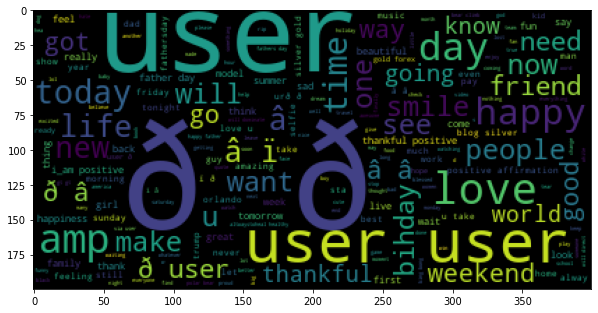

In [20]:
sentences = train['tweet'].tolist()
sentences_ss = " ".join(sentences)

plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(sentences_ss))

In [21]:
train['tweets_word_count'] = train['tweet'].apply(lambda x: len(x.strip().split()))

In [22]:
train.head()

,label,tweet,length,tweets_word_count
0,0,@user when a father is dysfunctional and is s...,102,18
1,0,@user @user thanks for #lyft credit i can't us...,122,19
2,0,bihday your majesty,21,3
3,0,#model i love u take with u all the time in ...,86,14
4,0,factsguide: society now #motivation,39,4


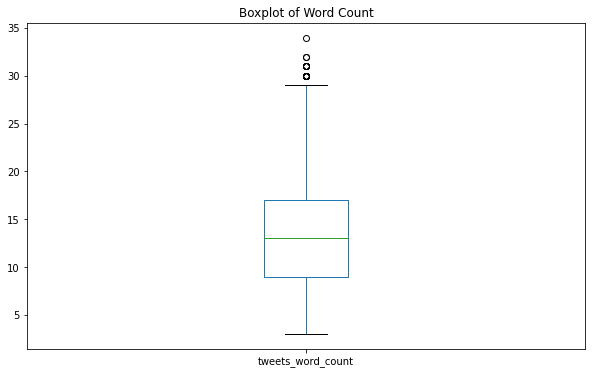

In [23]:
train['tweets_word_count'].plot(kind='box', title='Boxplot of Word Count', figsize=(10,6))
plt.show()

In [24]:
from langdetect import detect
from langdetect import DetectorFactory

# set seed
DetectorFactory.seed = 0

# hold label - language
languages = []

# go through each text
for ii in tqdm(range(0,len(train))):
    # split by space into list, take the first x intex, join with space
    text = train.iloc[ii]['tweet'].split(" ")
    
    lang = "en"
    try:
        if len(text) > 50:
            lang = detect(" ".join(text[:50]))
        elif len(text) > 0:
            lang = detect(" ".join(text[:len(text)]))
    # ught... beginning of the document was not in a good format
    except Exception as e:
        all_words = set(text)
        try:
            lang = detect(" ".join(all_words))
        # what!! :( let's see if we can find any text in abstract...
        except Exception as e:
            
            try:
                # let's try to label it through the abstract then
                lang = detect(merge2.iloc[ii]['abstract_summary'])
            except Exception as e:
                lang = "unknown"
                pass
    
    # get the language    
    languages.append(lang)

  0%|          | 0/31962 [00:00<?, ?it/s]

In [25]:
from pprint import pprint

languages_dict = {}
for lang in set(languages):
    languages_dict[lang] = languages.count(lang)
    
print("Total: {}\n".format(len(languages)))
pprint(languages_dict)

Total: 31962

{'af': 287,
 'ca': 68,
 'cs': 5,
 'cy': 145,
 'da': 259,
 'de': 48,
 'en': 29511,
 'es': 75,
 'et': 71,
 'fi': 19,
 'fr': 150,
 'hr': 22,
 'hu': 1,
 'id': 64,
 'it': 216,
 'lt': 1,
 'nl': 99,
 'no': 303,
 'pl': 17,
 'pt': 44,
 'ro': 66,
 'sk': 4,
 'sl': 20,
 'so': 195,
 'sq': 12,
 'sv': 29,
 'sw': 6,
 'tl': 175,
 'tr': 33,
 'vi': 17}


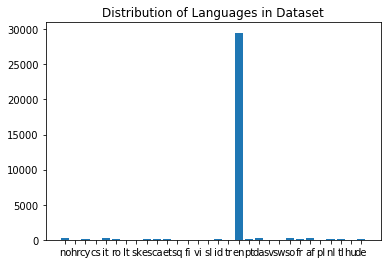

In [26]:
train['language'] = languages
plt.bar(range(len(languages_dict)), list(languages_dict.values()), align='center')
plt.xticks(range(len(languages_dict)), list(languages_dict.keys()))
plt.title("Distribution of Languages in Dataset")
plt.show()

In [27]:
train = train[train['language'] == 'en'] 
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29511 entries, 0 to 31961
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   label              29511 non-null  int64 
 1   tweet              29511 non-null  object
 2   length             29511 non-null  int64 
 3   tweets_word_count  29511 non-null  int64 
 4   language           29511 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.4+ MB


In [28]:
train.head()

,label,tweet,length,tweets_word_count,language
0,0,@user when a father is dysfunctional and is s...,102,18,en
1,0,@user @user thanks for #lyft credit i can't us...,122,19,en
3,0,#model i love u take with u all the time in ...,86,14,en
4,0,factsguide: society now #motivation,39,4,en
5,0,[2/2] huge fan fare and big talking before the...,116,19,en


In [29]:
import warnings
warnings.filterwarnings('ignore')

*Cleaning data*

In [30]:
train['clean_tweet']=train['tweet'].str.lower()
train.head()

,label,tweet,length,tweets_word_count,language,clean_tweet
0,0,@user when a father is dysfunctional and is s...,102,18,en,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...,122,19,en,@user @user thanks for #lyft credit i can't us...
3,0,#model i love u take with u all the time in ...,86,14,en,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,39,4,en,factsguide: society now #motivation
5,0,[2/2] huge fan fare and big talking before the...,116,19,en,[2/2] huge fan fare and big talking before the...


In [31]:
train['clean_tweet'].head()

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
5    [2/2] huge fan fare and big talking before the...
Name: clean_tweet, dtype: object

In [45]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before','user','amp','u','im',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']



In [46]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

train['clean_tweet'] = train['clean_tweet'].apply(lambda text: cleaning_stopwords(text))
train['clean_tweet'].head()

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit cant use cause dont offer w...
3                              model love take time ur
4                        factsguide society motivation
5    huge fan fare big talking leave chaos pay disp...
Name: clean_tweet, dtype: object

In [47]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

train['clean_tweet']= train['clean_tweet'].apply(lambda x: cleaning_punctuations(x))
train['clean_tweet'].head()

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit cant use cause dont offer w...
3                              model love take time ur
4                        factsguide society motivation
5    huge fan fare big talking leave chaos pay disp...
Name: clean_tweet, dtype: object

In [48]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

train['clean_tweet'] = train['clean_tweet'].apply(lambda x: cleaning_repeating_char(x))
train['clean_tweet'].head()

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit cant use cause dont offer w...
3                              model love take time ur
4                        factsguide society motivation
5    huge fan fare big talking leave chaos pay disp...
Name: clean_tweet, dtype: object

In [49]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

train['clean_tweet'] = train['clean_tweet'].apply(lambda x: cleaning_URLs(x))
train['clean_tweet'].head()

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit cant use cause dont offer w...
3                              model love take time ur
4                        factsguide society motivation
5    huge fan fare big talking leave chaos pay disp...
Name: clean_tweet, dtype: object

In [50]:
def cleaning_symb(data):
    return re.sub('(([^\x00-\x7F]+)|(s/ ( *)/\1/g))',' ',data)

train['clean_tweet'] = train['clean_tweet'].apply(lambda x: cleaning_symb(x))
train['clean_tweet'].head()

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit cant use cause dont offer w...
3                              model love take time ur
4                        factsguide society motivation
5    huge fan fare big talking leave chaos pay disp...
Name: clean_tweet, dtype: object

In [51]:
def cleaning_space(data):
    return re.sub('  +', ' ',data)

train['clean_tweet'] = train['clean_tweet'].apply(lambda x: cleaning_space(x))
train['clean_tweet'].head()

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit cant use cause dont offer w...
3                              model love take time ur
4                        factsguide society motivation
5    huge fan fare big talking leave chaos pay disp...
Name: clean_tweet, dtype: object

In [52]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

train['clean_tweet'] = train['clean_tweet'].apply(lambda x: cleaning_numbers(x))
train['clean_tweet'].head()

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit cant use cause dont offer w...
3                              model love take time ur
4                        factsguide society motivation
5    huge fan fare big talking leave chaos pay disp...
Name: clean_tweet, dtype: object

In [53]:
train

,label,tweet,length,tweets_word_count,language,clean_tweet
0,0,@user when a father is dysfunctional and is s...,102,18,en,father dysfunctional selfish drags kids dysfun...
1,0,@user @user thanks for #lyft credit i can't us...,122,19,en,thanks lyft credit cant use cause dont offer w...
3,0,#model i love u take with u all the time in ...,86,14,en,model love take time ur
4,0,factsguide: society now #motivation,39,4,en,factsguide society motivation
5,0,[2/2] huge fan fare and big talking before the...,116,19,en,huge fan fare big talking leave chaos pay disp...
...,...,...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68,5,en,ate isz youuu
31958,0,to see nina turner on the airwaves trying to...,131,23,en,see nina turner airwaves trying wrap mantle ge...
31959,0,listening to sad songs on a monday morning otw...,63,13,en,listening sad songs monday morning otw work sad
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67,10,en,sikh temple vandalised calgary wso condemns act


In [47]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KAUSHIK\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [54]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

train['clean_tweet'] = train['clean_tweet'].apply(lambda x: lemmatizer_on_text(x))
train['clean_tweet'].head()

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit cant use cause dont offer w...
3                              model love take time ur
4                        factsguide society motivation
5    huge fan fare big talking leave chaos pay disp...
Name: clean_tweet, dtype: object

In [55]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

train['clean_tweet'] = train['clean_tweet'].apply(lambda x: stemming_on_text(x))
train['clean_tweet'].head()

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit cant use cause dont offer w...
3                              model love take time ur
4                        factsguide society motivation
5    huge fan fare big talking leave chaos pay disp...
Name: clean_tweet, dtype: object

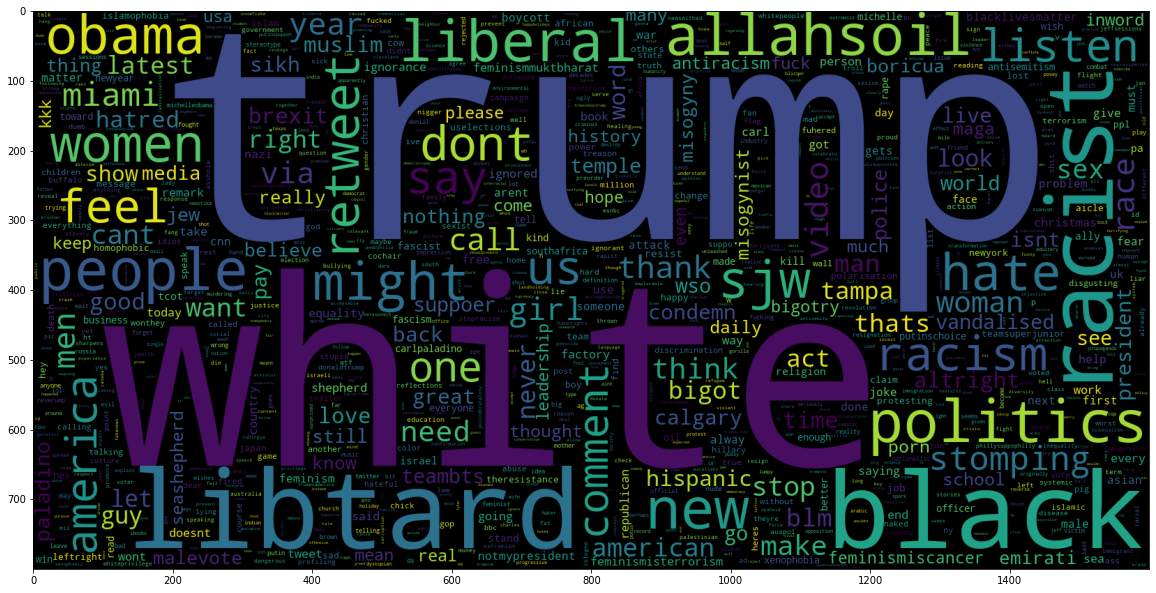

In [56]:
tweet_neg = train['clean_tweet'][train["label"]==1]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(tweet_neg))
plt.imshow(wc)

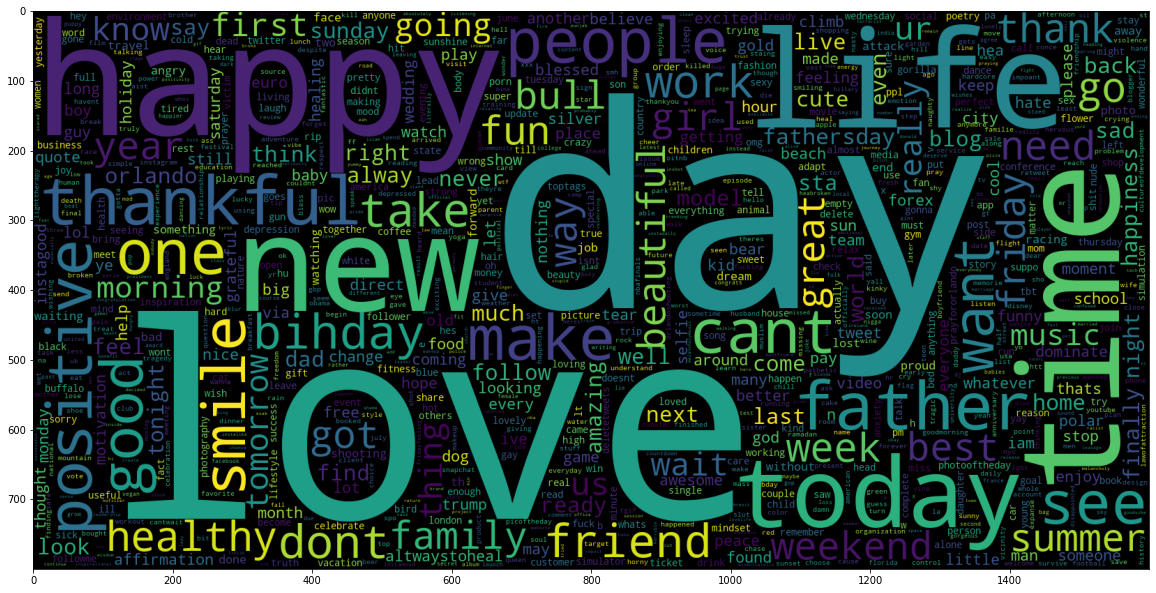

In [57]:
tweet_pos = train['clean_tweet'][train["label"]==0]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(tweet_pos))
plt.imshow(wc)

In [58]:
import plotly.express as px 

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
def count_ngrams(dataframe,column,begin_ngram,end_ngram):
    word_vectorizer = CountVectorizer(ngram_range=(begin_ngram,end_ngram), analyzer='word')
    sparse_matrix = word_vectorizer.fit_transform(dataframe[column].dropna())
    frequencies = sum(sparse_matrix).toarray()[0]
    most_common = pd.DataFrame(frequencies, 
                               index=word_vectorizer.get_feature_names(), 
                               columns=['frequency']).sort_values('frequency',ascending=False)
    most_common['ngram'] = most_common.index
    most_common.reset_index()
    return most_common

In [62]:
uni_gram = count_ngrams(train,'clean_tweet',1,1)

<Figure size 2880x504 with 0 Axes>

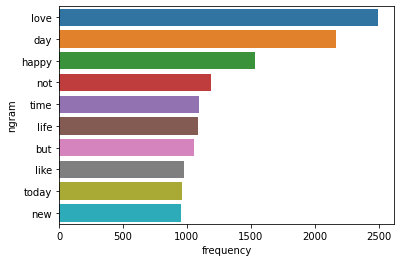

<Figure size 2880x504 with 0 Axes>

In [63]:
ax = sns.barplot(x="frequency", y="ngram", data=uni_gram.sort_values('frequency',ascending=False)[0:10],orient = 'h')
plt.figure(figsize=(40,7))

In [64]:
bii_gram = count_ngrams(train,'clean_tweet',2,2)

<Figure size 2880x504 with 0 Axes>

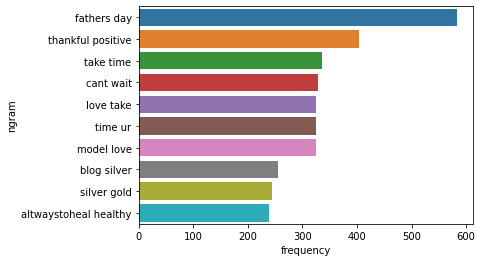

<Figure size 2880x504 with 0 Axes>

In [65]:
ax = sns.barplot(x="frequency", y="ngram", data=bii_gram.sort_values('frequency',ascending=False)[0:10],orient = 'h')
plt.figure(figsize=(40,7))

In [66]:
three_gram = count_ngrams(train,'clean_tweet',3,3)

<Figure size 2880x504 with 0 Axes>

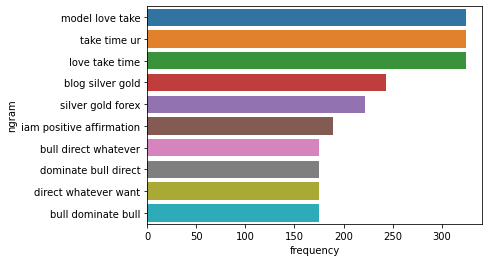

<Figure size 2880x504 with 0 Axes>

In [67]:
ax = sns.barplot(x="frequency", y="ngram", data=three_gram.sort_values('frequency',ascending=False)[0:10],orient = 'h')
plt.figure(figsize=(40,7))

In [68]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

train['clean_token_tweet']=train['clean_tweet'].apply(tokenizer.tokenize)
train['clean_token_tweet'].head()

0    [father, dysfunctional, selfish, drags, kids, ...
1    [thanks, lyft, credit, cant, use, cause, dont,...
3                        [model, love, take, time, ur]
4                    [factsguide, society, motivation]
5    [huge, fan, fare, big, talking, leave, chaos, ...
Name: clean_token_tweet, dtype: object

In [69]:
train

,label,tweet,length,tweets_word_count,language,clean_tweet,clean_token_tweet
0,0,@user when a father is dysfunctional and is s...,102,18,en,father dysfunctional selfish drags kids dysfun...,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,@user @user thanks for #lyft credit i can't us...,122,19,en,thanks lyft credit cant use cause dont offer w...,"[thanks, lyft, credit, cant, use, cause, dont,..."
3,0,#model i love u take with u all the time in ...,86,14,en,model love take time ur,"[model, love, take, time, ur]"
4,0,factsguide: society now #motivation,39,4,en,factsguide society motivation,"[factsguide, society, motivation]"
5,0,[2/2] huge fan fare and big talking before the...,116,19,en,huge fan fare big talking leave chaos pay disp...,"[huge, fan, fare, big, talking, leave, chaos, ..."
...,...,...,...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68,5,en,ate isz youuu,"[ate, isz, youuu]"
31958,0,to see nina turner on the airwaves trying to...,131,23,en,see nina turner airwaves trying wrap mantle ge...,"[see, nina, turner, airwaves, trying, wrap, ma..."
31959,0,listening to sad songs on a monday morning otw...,63,13,en,listening sad songs monday morning otw work sad,"[listening, sad, songs, monday, morning, otw, ..."
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67,10,en,sikh temple vandalised calgary wso condemns act,"[sikh, temple, vandalised, calgary, wso, conde..."


In [70]:
len(train['clean_token_tweet'])

29511

In [71]:
train['token_word_count'] = train['clean_token_tweet'].apply(lambda x: len(x))

In [72]:
train.head()

,label,tweet,length,tweets_word_count,language,clean_tweet,clean_token_tweet,token_word_count
0,0,@user when a father is dysfunctional and is s...,102,18,en,father dysfunctional selfish drags kids dysfun...,"[father, dysfunctional, selfish, drags, kids, ...",7
1,0,@user @user thanks for #lyft credit i can't us...,122,19,en,thanks lyft credit cant use cause dont offer w...,"[thanks, lyft, credit, cant, use, cause, dont,...",13
3,0,#model i love u take with u all the time in ...,86,14,en,model love take time ur,"[model, love, take, time, ur]",5
4,0,factsguide: society now #motivation,39,4,en,factsguide society motivation,"[factsguide, society, motivation]",3
5,0,[2/2] huge fan fare and big talking before the...,116,19,en,huge fan fare big talking leave chaos pay disp...,"[huge, fan, fare, big, talking, leave, chaos, ...",11


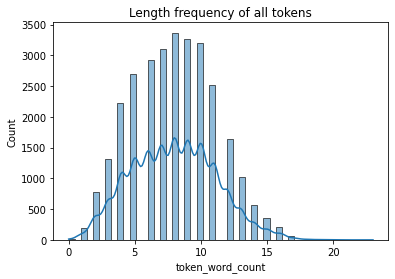

In [73]:
sns.histplot(train['token_word_count'],bins = 50,kde=True)

plt.title('Length frequency of all tokens')
plt.show()

<AxesSubplot:ylabel='Density'>

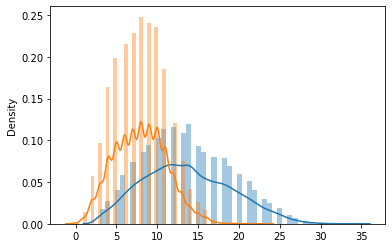

In [74]:
import numpy as np
sns.distplot(np.array(train.tweets_word_count))
sns.distplot(np.array(train.token_word_count))

In [75]:
train

,label,tweet,length,tweets_word_count,language,clean_tweet,clean_token_tweet,token_word_count
0,0,@user when a father is dysfunctional and is s...,102,18,en,father dysfunctional selfish drags kids dysfun...,"[father, dysfunctional, selfish, drags, kids, ...",7
1,0,@user @user thanks for #lyft credit i can't us...,122,19,en,thanks lyft credit cant use cause dont offer w...,"[thanks, lyft, credit, cant, use, cause, dont,...",13
3,0,#model i love u take with u all the time in ...,86,14,en,model love take time ur,"[model, love, take, time, ur]",5
4,0,factsguide: society now #motivation,39,4,en,factsguide society motivation,"[factsguide, society, motivation]",3
5,0,[2/2] huge fan fare and big talking before the...,116,19,en,huge fan fare big talking leave chaos pay disp...,"[huge, fan, fare, big, talking, leave, chaos, ...",11
...,...,...,...,...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68,5,en,ate isz youuu,"[ate, isz, youuu]",3
31958,0,to see nina turner on the airwaves trying to...,131,23,en,see nina turner airwaves trying wrap mantle ge...,"[see, nina, turner, airwaves, trying, wrap, ma...",14
31959,0,listening to sad songs on a monday morning otw...,63,13,en,listening sad songs monday morning otw work sad,"[listening, sad, songs, monday, morning, otw, ...",8
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67,10,en,sikh temple vandalised calgary wso condemns act,"[sikh, temple, vandalised, calgary, wso, conde...",7
